# `xeus-octave`: A native Octave kernel for jupyter with advanced visualization

`xeus-octave` is an Octave kernel for Jupyter built with Xeus, a C++ framework
for building Jupyter kernels, which means that it is completely native, and does
not run a virtual Octave session in a forked process.

Thanks to its being native, xeus-octave has access to the internal representation
of all Octave objects, and thus it is able to provide advanced visualisation of
many types with ease.

### Setup

Run the following cell to install the octave packages needed for this notebook.

In [ ]:
pkg install -forge control
pkg install -forge signal
pkg install -forge symbolic
pkg install "https://github.com/gnu-octave/pkg-json/archive/v1.5.0.tar.gz"

## Native Octave plots

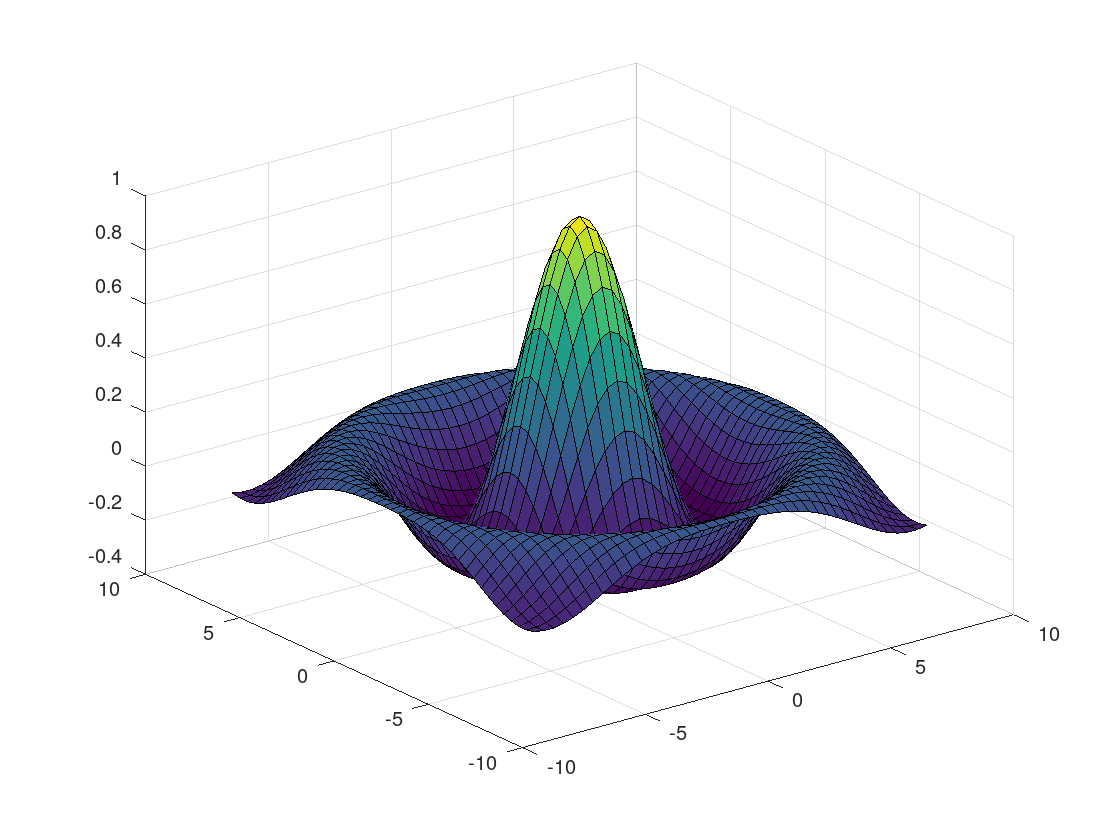

In [2]:
sombrero

## Matrices displayed as tables or $\LaTeX$:

In [3]:
disp("A table matrix: \n")
displayformat matrix html;
m = ones(3,3)
disp("\nAnd a latex one:\n")
displayformat matrix latex;
m

A table matrix: 



m,1,2,3
1,1,1,1
2,1,1,1
3,1,1,1



And a latex one:



m =    1   1   1
   1   1   1
   1   1   1


## Structs displayed as JSON objects:

This is supported only in Octave devel. In alternative install the [json](https://gnu-octave.github.io/pkg-index/package/pkg-json) package

In [4]:
% Backport to octave 6 of new json feature in octave 7
pkg load json

format = displayformat

format =   scalar structure containing the fields:

    matrix = latex
    bool matrix = html
    complex matrix = html
    range = html
    scalar = text
    complex scalar = text
    struct = json
    scalar struct = json


## Symbolic classes displayed in $\LaTeX$

In [6]:
pkg load symbolic

syms x 

f = (sin(x/2))^3 
diff(f, x)

## Input support

In [6]:
x = input("Enter value: ")

Enter value:  12


x = 12


## Formatted help 

In [7]:
plot?

‘-’,Use solid lines (default).
‘--’,Use dashed lines.
‘:’,Use dotted lines.
‘-.’,Use dash-dotted lines.
‘+’,crosshair
‘o’,circle
‘*’,star
‘.’,point
‘x’,cross
‘s’,square
‘d’,diamond


## Widgets

In [8]:
function [box, w] = widget_with_desc(desc, widget)
    box = xhbox;
    w = widget;
    lab = xxlabel;
    lab.Value = [ desc ": " ];
    box.add(lab);
    box.add(widget);
endfunction

# Numerics demo
win.numerics = xvbox;

win.slider = xslider;
win.slider.Description = "Slider";
win.numerics.add(win.slider);

win.progress = xprogress;
win.progress.Description = "Progress";
win.progress.Value = 33;
win.numerics.add(win.progress);

win.numeral = xnumeral;
win.numeral.Description = "Numeral";
win.numerics.add(win.numeral);

# Boolean demo
win.boolean = xvbox;
# Selection demo
win.selection = xvbox;

# Strings demo
win.strings = xvbox;

win.text = xtext;
win.text.Description = "Text";
win.text.Placeholder = "This is text";
win.strings.add(win.text);

win.textarea = xtextarea;
win.textarea.Description = "Textarea";
win.textarea.Placeholder = "This is text";
win.textarea.Rows = 5;
win.strings.add(win.textarea);

win.password = xpassword;
win.password.Description = "Password";
win.password.Placeholder = "This is a password";
win.strings.add(win.password);

win.html = xhtml;
win.html.Description = "HTML";
win.html.Placeholder = "This is a HTML";
win.html.Value = "<h1>This is real HTML</h1><p>With real HTML tags</p>";
win.strings.add(win.html);

# Image demo
win.image = xhbox;

win._image1 = xfigure;
sombrero;
win.image.add(win._image1);

win._image2 = ximage;
win._image2.Format = "url";
win._image2.Value = "https://picsum.photos/640/480";
win.image.add(win._image2);

# Buttons demo
win.buttons = xvbox;

win.button = xbutton;
win.button.Description = "Button";
win.button.Tooltip = "Button";
win.button.Icon = "check";
win.button.ButtonStyle = "danger";
win.buttons.add(win.button);

win.play = xplay;
win.buttons.add(win.play);

# Output demo
win.output = xvbox;
win._output = xoutput;
win.output.add(win._output);

# Layouts demo
win.layouts = xvbox;

win.accordion = xaccordion;
win.accordion1 = xxlabel;
win.accordion1.Value = "Hello";
win.accordion.add(win.accordion1);
win.accordion2 = xxlabel;
win.accordion2.Value = "world!";
win.accordion.add(win.accordion2);
win.accordion.Titles = {"Accordion 1", "Accordion 2"};
win.layouts.add(win.accordion);

# Build tabs
win.tabs = xtab;
win.tabs.add(win.numerics);
win.tabs.add(win.boolean);
win.tabs.add(win.selection);
win.tabs.add(win.strings);
win.tabs.add(win.image);
win.tabs.add(win.buttons);
win.tabs.add(win.output);
win.tabs.add(win.layouts);
win.tabs.Titles = {"Numeric widgets", "Boolean widgets", "Selection widgets", "String widgets", "Image", "Buttons", "Output", "Layouts"};

% Callbacks
function on_clicked(b, o)
    o.capture;
    disp("Button clicked");
    o.release;
endfunction
function on_value_changed(p, f)
    f.select;
    view(p.Value, 30);
    drawnow;
endfunction

win.button.on_click(@on_clicked, win._output)
win.play.observe_Value(@on_value_changed, win._image1)

win.tabs

A Jupyter widget

## Example: notch filter

### Parameters

In [9]:
w0 = 2*pi*1000;     % Target frequency
Q = 100;            % Analog selectivity
Tc = 1/50e3;        % Sampling time    

### Filter design

The analog solution has the following transfer function:

In [10]:
pkg load signal
pkg load control

%% Analog solution
s = tf('s');
N = 1+(s/w0)^2;                  
D = 1 + s/(Q*w0) + (s/w0)^2;
F = N/D                          % Analog notch filter                

Continuous-time model.



The discrete solution has the following transfer function:

In [11]:
F_d = c2d(F,Tc,'zoh')            % Discretisation   

Sampling time: 2e-05 s
Discrete-time model.



### Bode diagram

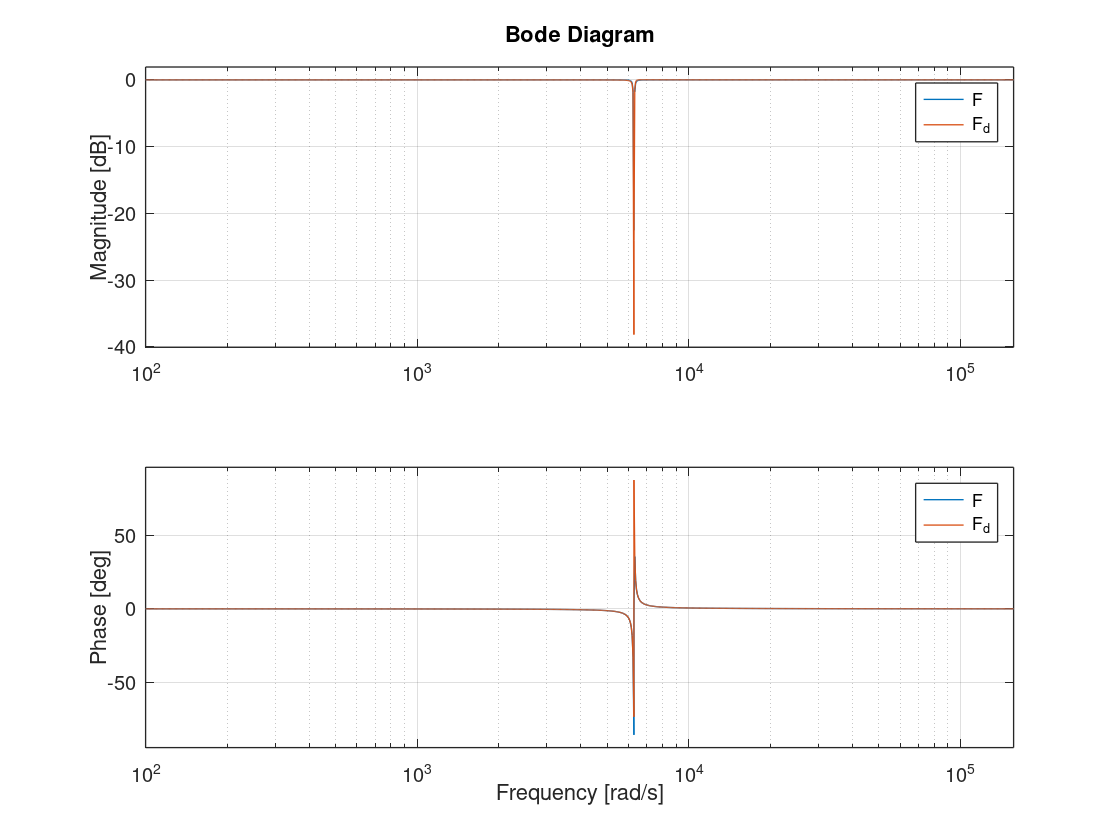

In [12]:
bode(F,F_d);
legend("F", "F_d")